## Robust Regression

   Resolving package versions...
  No Changes to `C:\Users\dz28l\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\dz28l\.julia\environments\v1.11\Manifest.toml`


The true relationship is 0.9776476808621083 + 0.9200568860958009*x


   Resolving package versions...
   Installed libdecor_jll ───────────────── v0.2.2+0
   Installed GR_jll ─────────────────────── v0.73.13+0
   Installed libfdk_aac_jll ─────────────── v2.0.3+0
   Installed Libmount_jll ───────────────── v2.40.3+0
   Installed JpegTurbo_jll ──────────────── v3.1.1+0
   Installed LERC_jll ───────────────────── v4.0.1+0
   Installed LoggingExtras ──────────────── v1.1.0
   Installed x265_jll ───────────────────── v3.5.0+0
   Installed Opus_jll ───────────────────── v1.3.3+0
   Installed Xorg_xkbcomp_jll ───────────── v1.4.6+1
   Installed Measures ───────────────────── v0.3.2
   Installed RelocatableFolders ─────────── v1.0.1
   Installed Unitful ────────────────────── v1.22.0
   Installed Contour ────────────────────── v0.6.3
   Installed Grisu ──────────────────────── v1.0.2
   Installed Xorg_xcb_util_wm_jll ───────── v0.4.1+1
   Installed Xorg_xcb_util_image_jll ────── v0.4.0+1
   Installed RecipesPipeline ────────────── v0.6.12
   Installed PlotUtils

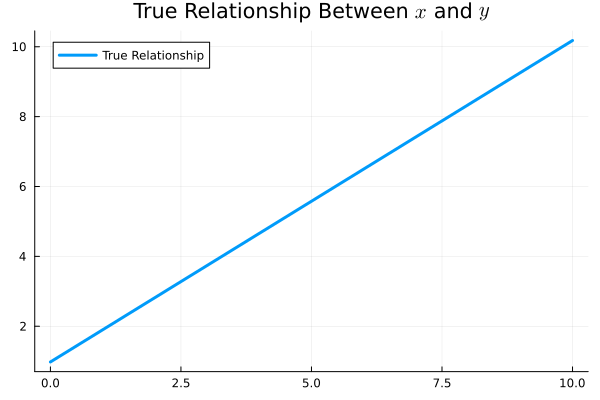

In [3]:
#If you have never used the Random package before
using Pkg
Pkg.add("Random")
using Random

#Set the seed of the random number generator so that the results are reproducible
#If you change the number in the parentheses, the random values below will change
Random.seed!(5)

#Make a random relationship 
βstar = rand(2);

println("The true relationship is ", βstar[1], " + ", βstar[2], "*x")

#The true relationship is \betastar[1] + \betastar[2]*x

#If you have never used the Plots package before
using Pkg
Pkg.add("Plots")
using Plots
xvals = LinRange(0,10,100);
yvals = βstar[1] .+ βstar[2].*xvals;
plot(xvals,yvals, lw = 3, label = "True Relationship")
title!("True Relationship Between \$x\$ and \$y\$")

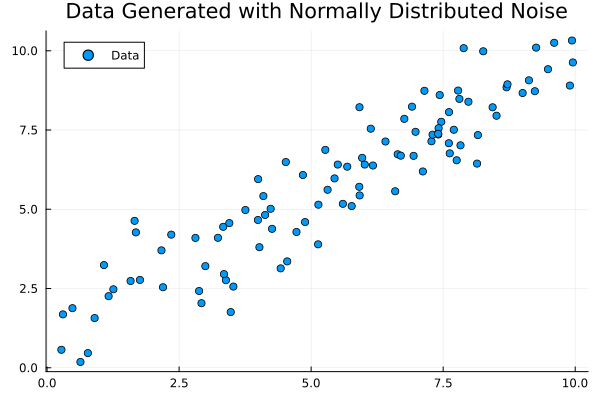

In [4]:
#Create some data
#Create a random vector x of 100 values uniformly distributed between 0 and 10
x = 10*rand(100)

#ystar is the output with the true relationship (no noise)
ystar = βstar[1] .+ βstar[2].*x

#Add normally distributed noise to each sample with mean 0 and variance 1
y = ystar + randn(100)

#Display data in a scatter plot
plot(x, y, seriestype=:scatter, label = "Data")
title!("Data Generated with Normally Distributed Noise")

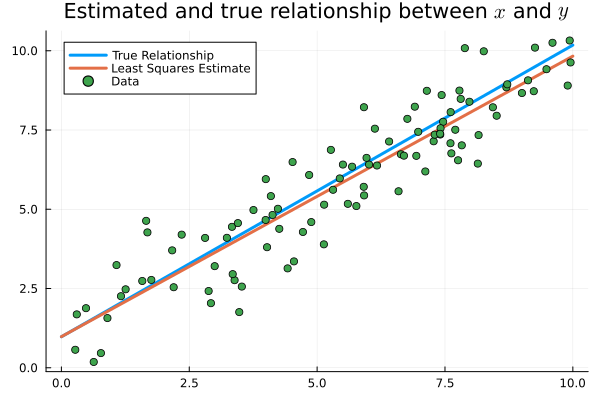

In [5]:
#Fit the data to a linear model. To allow for a y-intercept that is not just 0, we must augment the dataset as
xaugmented = hcat(ones(100), x)

#Built in least-squares solution using \ operator
β = xaugmented\y

#Plot regression line and true relationship on top of one another
predictions = β[1] .+ β[2].*xvals;
plot(xvals,yvals, lw = 3, label = "True Relationship")
plot!(xvals,predictions, lw = 3, label = "Least Squares Estimate")
plot!(x, y, seriestype=:scatter, label = "Data")
title!("Estimated and true relationship between \$x\$ and \$y\$")

The predicted fit is pretty accurate to the true relationship!

However, this is mostly because the noise in the problem isn't too bad. What if $y$ is generated differently?

   Resolving package versions...
   Installed PDMats ────────────────── v0.11.32
   Installed Rmath_jll ─────────────── v0.5.1+0
   Installed QuadGK ────────────────── v2.11.2
   Installed Rmath ─────────────────── v0.8.0
   Installed HypergeometricFunctions ─ v0.3.27
   Installed StatsFuns ─────────────── v1.3.2
   Installed FillArrays ────────────── v1.13.0
   Installed Distributions ─────────── v0.25.117
    Updating `C:\Users\dz28l\.julia\environments\v1.11\Project.toml`
  [31c24e10] + Distributions v0.25.117
    Updating `C:\Users\dz28l\.julia\environments\v1.11\Manifest.toml`
  [31c24e10] + Distributions v0.25.117
  [1a297f60] + FillArrays v1.13.0
  [34004b35] + HypergeometricFunctions v0.3.27
  [90014a1f] + PDMats v0.11.32
  [1fd47b50] + QuadGK v2.11.2
  [79098fc4] + Rmath v0.8.0
  [4c63d2b9] + StatsFuns v1.3.2
  [f50d1b31] + Rmath_jll v0.5.1+0
  [4607b0f0] + SuiteSparse
Precompiling project...
   1782.4 ms  ✓ Rmath_jll
   1232.1 ms  ✓ SuiteSparse
   2053.7 ms  ✓ FillArrays
   1

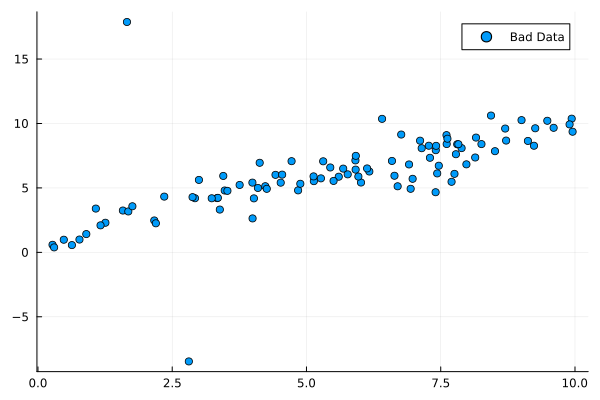

In [6]:
#If you've never used Distributions before
using Pkg
Pkg.add("Distributions")

using Distributions
#Standard Cauchy distribution. Particularly pathological and bad
dist1 = Cauchy()
ybad = ystar + rand(dist1,100);

#Student's t-Distribution with 2 degrees of freedom. Less bad than Cauchy (t-Dist with 1 degree of freedom)
#and worse than Normal (t-Dist with degrees of freedom -> infinity)
dist2 = TDist(2)
ybad = ystar + rand(dist2,100);

plot(x, ybad, seriestype=:scatter, label = "Bad Data")

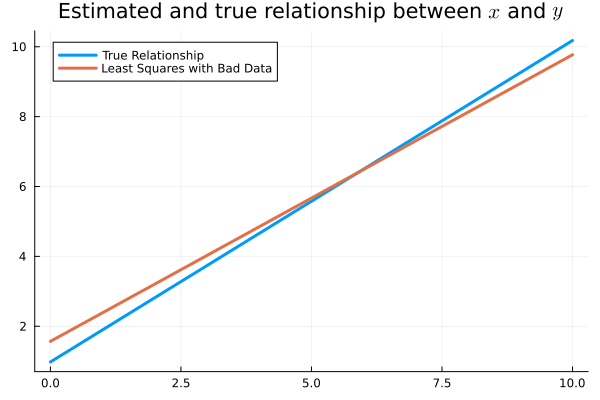

In [7]:
βbad = xaugmented\ybad
bad_predictions = βbad[1] .+ βbad[2].*xvals;
plot(xvals,yvals, lw = 3, label = "True Relationship")
plot!(xvals,bad_predictions, lw = 3, label = "Least Squares with Bad Data")
#plot!(x, ybad, seriestype=:scatter, label = "Bad Data")
title!("Estimated and true relationship between \$x\$ and \$y\$")

In [8]:
using JuMP
using HiGHS

regression = Model(HiGHS.Optimizer)
@variable(regression, βlp[1:2])
@variable(regression, t[1:100])
@constraint(regression, tpositive[i in 1:100], t[i] >= βlp[1] + βlp[2]*x[i] - ybad[i])
@constraint(regression, tnegative[i in 1:100], t[i] >= -βlp[1] - βlp[2]*x[i] + ybad[i])
@objective(regression, Min, sum(t[i] for i in 1:100))

print(regression)

Min t[1] + t[2] + t[3] + t[4] + t[5] + t[6] + t[7] + t[8] + t[9] + t[10] + t[11] + t[12] + t[13] + t[14] + t[15] + t[16] + t[17] + t[18] + t[19] + t[20] + t[21] + t[22] + t[23] + t[24] + t[25] + t[26] + t[27] + t[28] + t[29] + t[30] + [[...40 terms omitted...]] + t[71] + t[72] + t[73] + t[74] + t[75] + t[76] + t[77] + t[78] + t[79] + t[80] + t[81] + t[82] + t[83] + t[84] + t[85] + t[86] + t[87] + t[88] + t[89] + t[90] + t[91] + t[92] + t[93] + t[94] + t[95] + t[96] + t[97] + t[98] + t[99] + t[100]
Subject to
 tpositive[1] : -βlp[1] - 8.70050607316552 βlp[2] + t[1] >= -9.606438813151685
 tpositive[2] : -βlp[1] - 4.23354361278987 βlp[2] + t[2] >= -5.132333445992284
 tpositive[3] : -βlp[1] - 4.520441932313954 βlp[2] + t[3] >= -5.4070974560791765
 tpositive[4] : -βlp[1] - 9.938435069453979 βlp[2] + t[4] >= -10.373072519306996
 tpositive[5] : -βlp[1] - 7.888326559680227 βlp[2] + t[5] >= -8.088505601310766
 tpositive[6] : -βlp[1] - 0.27135689021179576 βlp[2] + t[6] >= -0.5866613990761688
 tp

In [9]:
optimize!(regression)

Running HiGHS 1.9.0 (git hash: 66f735e60): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [3e-01, 1e+01]
  Cost   [1e+00, 1e+00]
  Bound  [0e+00, 0e+00]
  RHS    [4e-01, 2e+01]
Presolving model
200 rows, 102 cols, 600 nonzeros  0s
200 rows, 102 cols, 600 nonzeros  0s
Presolve : Reductions: rows 200(-0); columns 102(-0); elements 600(-0) - Not reduced
Problem not reduced by presolve: solving the LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0    -1.7650000000e+05 Ph1: 200(425322); Du: 100(176.5) 0s
        155     1.0556604663e+02 Pr: 0(0) 0s
Model status        : Optimal
Simplex   iterations: 155
Objective value     :  1.0556604663e+02
Relative P-D gap    :  1.4807734765e-15
HiGHS run time      :          0.03


In [ ]:
βabsolute = value.(βlp)
better_predictions =  βabsolute[1] .+ βabsolute[2].*xvals;

plot(xvals,yvals, lw = 3, label = "True Relationship")
# plot!(xvals,bad_predictions, lw = 3, label = "Least Squares Estimate")
plot!(xvals,better_predictions, lw = 3, label = "Least Absolute Deviations Estimate")
# plot!(x, ybad, seriestype=:scatter, label = "Bad Data")
title!("Estimated and true relationship between \$x\$ and \$y\$")